

In this experiment you will use ping, traceroute and iperf.

###### Setup:  
-- `ssh-add` (Machine A) #if it fails, run first: eval `ssh-agent -s`  
-- `mkdir /home/l51/<crsid>` (Machine A, replace <crsid> with your crsid) 
  
-- `cd /home/l51/<crsid>` (Machine A)  
-- `git clone http://github.com/cucl-srg/P51a` (Machine A)  
-- `/home/l51/P51a/setup/mkdir1.sh <crsid>`. (Machine A)   


In [29]:
crsid='sl955' #your crsid
%run /home/l51/$crsid/P51a/Jupyter/useful/useful.py
%run /home/l51/$crsid/P51a/Jupyter/useful/useful1.py
%matplotlib inline
machA_ip = '128.232.82.184'
machB_ip = '128.232.82.185' # XXX REPLACE THIS WITH THE IP of the host 128.232.XXX.YYY

# 1. ping
ping is used to test the reachability of a host on an IP network. The source sends an ICMP Echo Request and the destination sends an ICMP Echo Reply. The round-trip time is measured.  
  
###### Usage:
  
`ping <address> [Optional: -c <count>] [Optional: -i <interval>] [Optional: -f]`  
interval = gap between pings in seconds, default=1  
-f = pings as fast as possible  
count = number of pings. If unspecified, ping runs until killed. 

### Experiment 1
Ping 1000 times. Plot the CDF of RTTs.

#### 1a A ping B

<font color='red'>TODO:</font> Fill in `ping_cmd`, the command to ping from Machine A to Machine B, 1000 times, interval 0.001 seconds.

In [15]:
ping_cmd = f'sudo ping -c 1000 -i 0.001 {machB_ip}'
for i in range(10):
    local_cmd(ping_cmd+' | grep -e "ttl" > /home/l51/'+crsid+'/P51aLab1/1/exp1a_'+str(i))

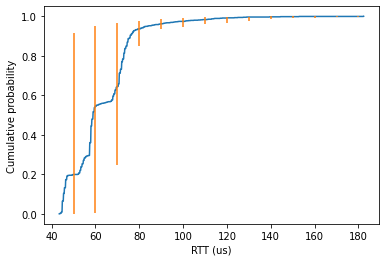

In [16]:
graph1('exp1a',crsid,10.0,1000)

#### 1b B ping A

<font color='red'>TODO:</font> Fill in `ping_cmd`, the command to ping from Machine B to Machine A, 1000 times, interval 0.001 seconds.

In [36]:
ping_cmd = f'sudo ping -c 1000 -i 0.001 {machA_ip}'
ssh = ssh_connect(machB_ip)
for i in range(10):
    with open('/home/l51/'+crsid+'/P51aLab1/1/exp1b_'+str(i),'w+') as f:
        output = ssh_cmd(ping_cmd+' | grep -e "ttl"',ssh)
        f.write(output)
ssh.close()

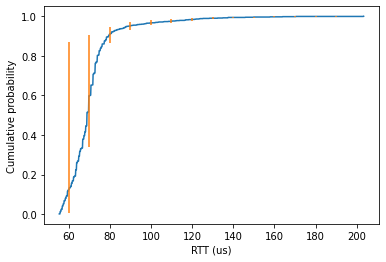

In [33]:
graph1('exp1b',crsid,10.0,1000)

### Experiment 2
Ping 500 times with varying intervals. Plot the CDFs of RTTs.

#### 2a A ping B

<font color='red'>TODO:</font> Fill in `ping_cmd`, the command to ping from Machine A to Machine B, 500 times for each interval.

In [37]:
interval=['0.000001', '0.00001', '0.0001','0.001','0.01','0.1']
for i in interval:
    ping_cmd = f'sudo ping -c 500 -i {i} {machB_ip}'
    local_cmd(ping_cmd+' | grep -e "ttl" > /home/l51/'+crsid+'/P51aLab1/2/exp2a_'+i)

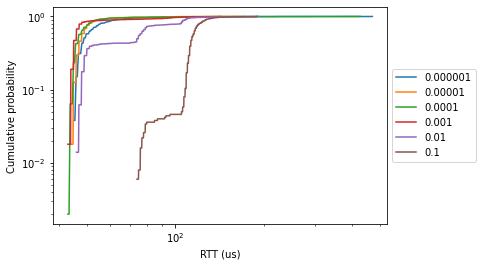

In [38]:
interval=['0.000001', '0.00001', '0.0001','0.001','0.01','0.1']
def graph2(exp,interval,num):
    for i in interval:
        rtt= getrtt('2/'+exp+'_'+i,crsid,num)
        values, base = np.histogram(rtt, bins=1000)
        cumulative = np.cumsum(values/float(num))
        plt.plot(base[:-1], cumulative, label=i)
        plt.yscale('log')
        plt.xscale('log')
    plt.ylabel("Cumulative probability")
    plt.xlabel("RTT (us)")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()
graph2('exp2a',interval,500)

#### 2b B ping A

<font color='red'>TODO:</font> Fill in `ping_cmd`, the command to ping from Machine B to Machine A, 500 times for each interval.

In [39]:
interval=['0.000001', '0.00001', '0.0001','0.001','0.01','0.1']
ssh = ssh_connect(machB_ip)
for i in interval:
    with open('/home/l51/'+crsid+'/P51aLab1/2/exp2b_'+str(i),'w+') as f:
        ping_cmd = f'sudo ping -c 500 -i {i} {machA_ip}'
        output = ssh_cmd(ping_cmd+' | grep -e "ttl"',ssh)
        f.write(output)
ssh.close()

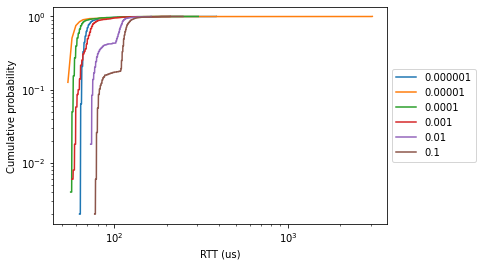

In [40]:
interval=['0.000001', '0.00001', '0.0001','0.001','0.01','0.1']
graph2('exp2b',interval,500)

### Experiment 3
Ping 10000 times using flooding.

#### 3a A ping B

<font color='red'>TODO:</font> Fill in `ping_cmd`, the command to ping from Machine A to Machine B 10000 times using flooding.

In [45]:
ping_cmd = f'sudo ping -c 10000 -f {machB_ip}'
print(local_cmd(ping_cmd + ' | grep -e "transmitted" -e "rtt"'))

b'10000 packets transmitted, 10000 received, 0% packet loss, time 722ms\nrtt min/avg/max/mdev = 0.042/0.047/0.197/0.008 ms, ipg/ewma 0.072/0.044 ms\n'


#### 3b B ping A

<font color='red'>TODO:</font> Fill in `ping_cmd`, the command to ping from Machine B to Machine A 10000 times using flooding.

In [46]:
ssh = ssh_connect(machB_ip)
ping_cmd = f'sudo ping -c 10000 -f {machA_ip}'
print(ssh_cmd(ping_cmd+' | grep -e "transmitted" -e "rtt"', ssh))
ssh.close()

10000 packets transmitted, 10000 received, 0% packet loss, time 682ms
rtt min/avg/max/mdev = 0.042/0.045/0.664/0.007 ms, ipg/ewma 0.068/0.045 ms



### Experiment 4
Ping 10000 times using flooding, pinning to core 2.

taskset can be used to launch a command with a given CPU affinity. This means that the process will only run on the list of specified CPU cores.
###### Usage: 
`sudo taskset -c <list of CPU cores> command [arguments]`    

#### A ping B

<font color='red'>TODO:</font> Fill in `cmd`, the command to ping from Machine A to Machine B 10000 times using flooding, pinning to core 2.

In [47]:
cmd = f'sudo taskset -c 2 sudo ping -c 1000 -f {machB_ip}'
print(local_cmd(cmd+' | grep -e "transmitted" -e "rtt"'))

b'1000 packets transmitted, 1000 received, 0% packet loss, time 140ms\nrtt min/avg/max/mdev = 0.053/0.065/0.236/0.013 ms, ipg/ewma 0.140/0.057 ms\n'


#### B ping A

<font color='red'>TODO:</font> Fill in `cmd`, the command to ping from Machine B to Machine A 10000 times using flooding, pinning to core 2.

In [48]:
cmd = f'sudo taskset -c 2 sudo ping -c 1000 -f {machA_ip}'
ssh = ssh_connect(machB_ip)
print(ssh_cmd(cmd+' | grep -e "transmitted" -e "rtt"', ssh))
ssh.close()

1000 packets transmitted, 1000 received, 0% packet loss, time 103ms
rtt min/avg/max/mdev = 0.043/0.070/0.292/0.012 ms, ipg/ewma 0.103/0.045 ms



### Experiment 5
Ping 100 times for interval 0.001 and 0.000001, with varying rx-usecs. Plot the maximum, median and minimum RTTs for each rx-usecs value.

ethtool can be used to change interrupt rates for some NICs. rx-usecs is the number of microseconds to wait before raising an RX interrupt after a packet has been received. When rx-usecs is 0, rx-frames is used instead, the number of frames to queue up before raising an RX interrupt.   

#### 5a A ping B

<font color='red'>TODO:</font> Fill in `ping_cmd1`, the command to ping from Machine A to Machine B, 100 times, interval 0.001 seconds. Fill in `ping_cmd2`, the command to ping from Machine A to Machine B, 100 times, interval 0.000001 seconds.

In [59]:
usecs = [1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
ssh = ssh_connect(machB_ip)
for u in usecs:
    for i in range(10):
        ssh_cmd("sudo ethtool -C eth0 rx-usecs " + str(u), ssh) # set rx-usecs
        sleep(1)
        ping_cmd1 = f'sudo ping -c 100 -i 0.001 {machB_ip}'
        local_cmd(ping_cmd1+' | grep -e "ttl" > /home/l51/'+crsid+'/P51aLab1/5/exp5a_0.001_'+str(u)+'_'+str(i))
        ping_cmd2 = f'sudo ping -c 100 -i 0.000001 {machA_ip}'
        local_cmd(ping_cmd2+' | grep -e "ttl" > /home/l51/'+crsid+'/P51aLab1/5/exp5a_0.000001_'+str(u)+'_'+str(i))
ssh_cmd("sudo ethtool -C eth0 rx-usecs 0", ssh)
ssh.close()

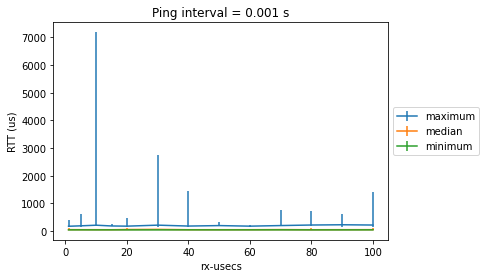

In [60]:
graph5_001('exp5a',crsid,usecs,100)

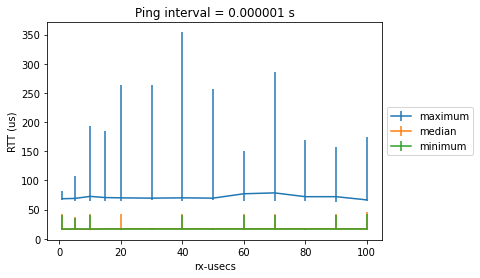

In [61]:
graph5_000001('exp5a',crsid,usecs,100)

#### 5b B ping A

<font color='red'>TODO:</font> Fill in `ping_cmd1`, the command to ping from Machine B to Machine A, 100 times, interval 0.001 seconds. Fill in `ping_cmd2`, the command to ping from Machine B to Machine A, 100 times, interval 0.000001 seconds.

In [62]:
usecs = [1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
ssh = ssh_connect(machB_ip)
for u in usecs:
    for i in range(10):
        local_cmd("sudo ethtool -C eth0 rx-usecs " + str(u)) # set rx-usecs
        with open('/home/l51/'+crsid+'/P51aLab1/5/exp5b_0.001_'+str(u)+'_'+str(i),'w+') as f:
            ping_cmd1 = f'sudo ping -c 100 -i 0.001 {machA_ip}'
            output = ssh_cmd(ping_cmd1+' | grep -e "ttl"' ,ssh)
            f.write(output)
        with open('/home/l51/'+crsid+'/P51aLab1/5/exp5b_0.000001_'+str(u)+'_'+str(i),'w+') as f:
            ping_cmd2 = f'sudo ping -c 100 -i 0.000001 {machB_ip}'
            output = ssh_cmd(ping_cmd2+' | grep -e "ttl"',ssh)
            f.write(output)
ssh.close()                
local_cmd("sudo ethtool -C eth0 rx-usecs 0")

b''

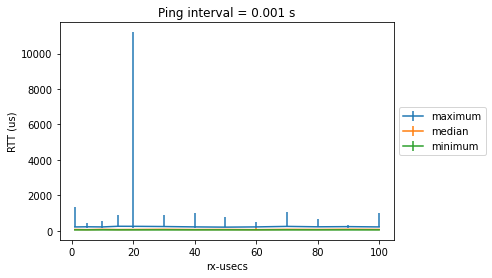

In [63]:
graph5_001('exp5b',crsid,usecs,100)

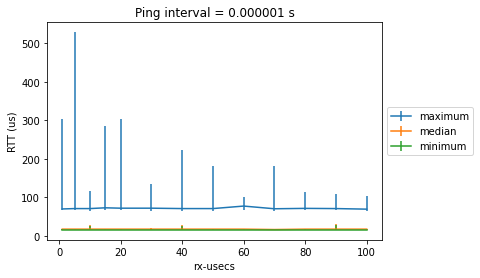

In [64]:
graph5_000001('exp5b',crsid,usecs,100)